---
title: "Decision tree"
format: 
  html:
    code-fold: true
execute: 
  enabled: true
---

## Brief introduction of Decision tree
A decision tree is a powerful and popular machine learning algorithm used for both classification and regression tasks. It is a predictive modeling tool that maps observations about an item to conclusions about the item's target value. The decision tree structure resembles an inverted tree, where each node represents a decision or test on an attribute, each branch represents an outcome of the test, and each leaf node represents a class label or a numerical value.

### Binary classification with decision trees

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### We will be using y="target" (output target) and all other remaining columns as our X (input feature) matrix for binary classification. 
Below is the processing of the data.

In [2]:
data = pd.read_csv('./Data/RoadAccident.csv')
column_datatypes = set()
for column in data.columns:
    column_datatypes.add(str(data[column].dtype))
print("The dataset contains {} different data types and they are: {}".format(len(column_datatypes), ", ".join(column_datatypes)))
X = data.drop(columns='Accident_Severity')
numerical_features = list()
categorical_features = list()
for column in X.columns:
    if (data[column].dtype == 'float64' or data[column].dtype == 'int64'):
        numerical_features.append(column)
    elif (data[column].dtype == 'object'):
        categorical_features.append(column)
y = data['Accident_Severity']
X = X.drop(columns=['Accident_Index','Datetime'])
discrete_features = ['Driver_IMD_Decile','Speed_limit','Year','Season','Month_of_Year','Day_of_Month','Day_of_Week','Number_of_Vehicles','Age_of_Driver']
for item in discrete_features:
    numerical_features.remove(item)
    categorical_features.append(item)
numerical_features.remove('Accident_Index')
categorical_features.remove('Datetime')
categorical_features_index = list()
for i in categorical_features:
    categorical_features_index.append(X.columns.get_loc(i))
    X[i] = LabelEncoder().fit_transform(X[i])
X.head()

The dataset contains 3 different data types and they are: float64, object, int64


,Latitude,Longitude,Region,Urban_or_Rural_Area,X1st_Road_Class,Driver_IMD_Decile,Speed_limit,Road_Type,Road_Surface_Conditions,Weather,...,Age_of_Vehicle,Junction_Detail,Junction_Location,X1st_Point_of_Impact,Driver_Journey_Purpose,Engine_CC,Propulsion_Code,Vehicle_Make,Vehicle_Category,Vehicle_Manoeuvre
0,51.495653,-0.179097,2,1,3,6,1,3,0,0,...,8,2,8,2,2,1781,1,0,1,1
1,51.499635,-0.209915,2,1,0,2,1,3,0,0,...,2,1,7,4,2,2987,0,10,1,10
2,51.492515,-0.168130,2,1,5,4,1,3,0,0,...,11,0,7,2,1,998,1,12,1,1
3,51.504784,-0.193863,2,1,0,1,1,3,0,0,...,5,7,7,4,1,2179,0,2,5,8
4,51.522072,-0.212927,2,1,2,2,1,3,4,0,...,4,7,0,3,1,2198,0,4,5,3


### Show the heat-map for the correlation matrix

(30, 30)


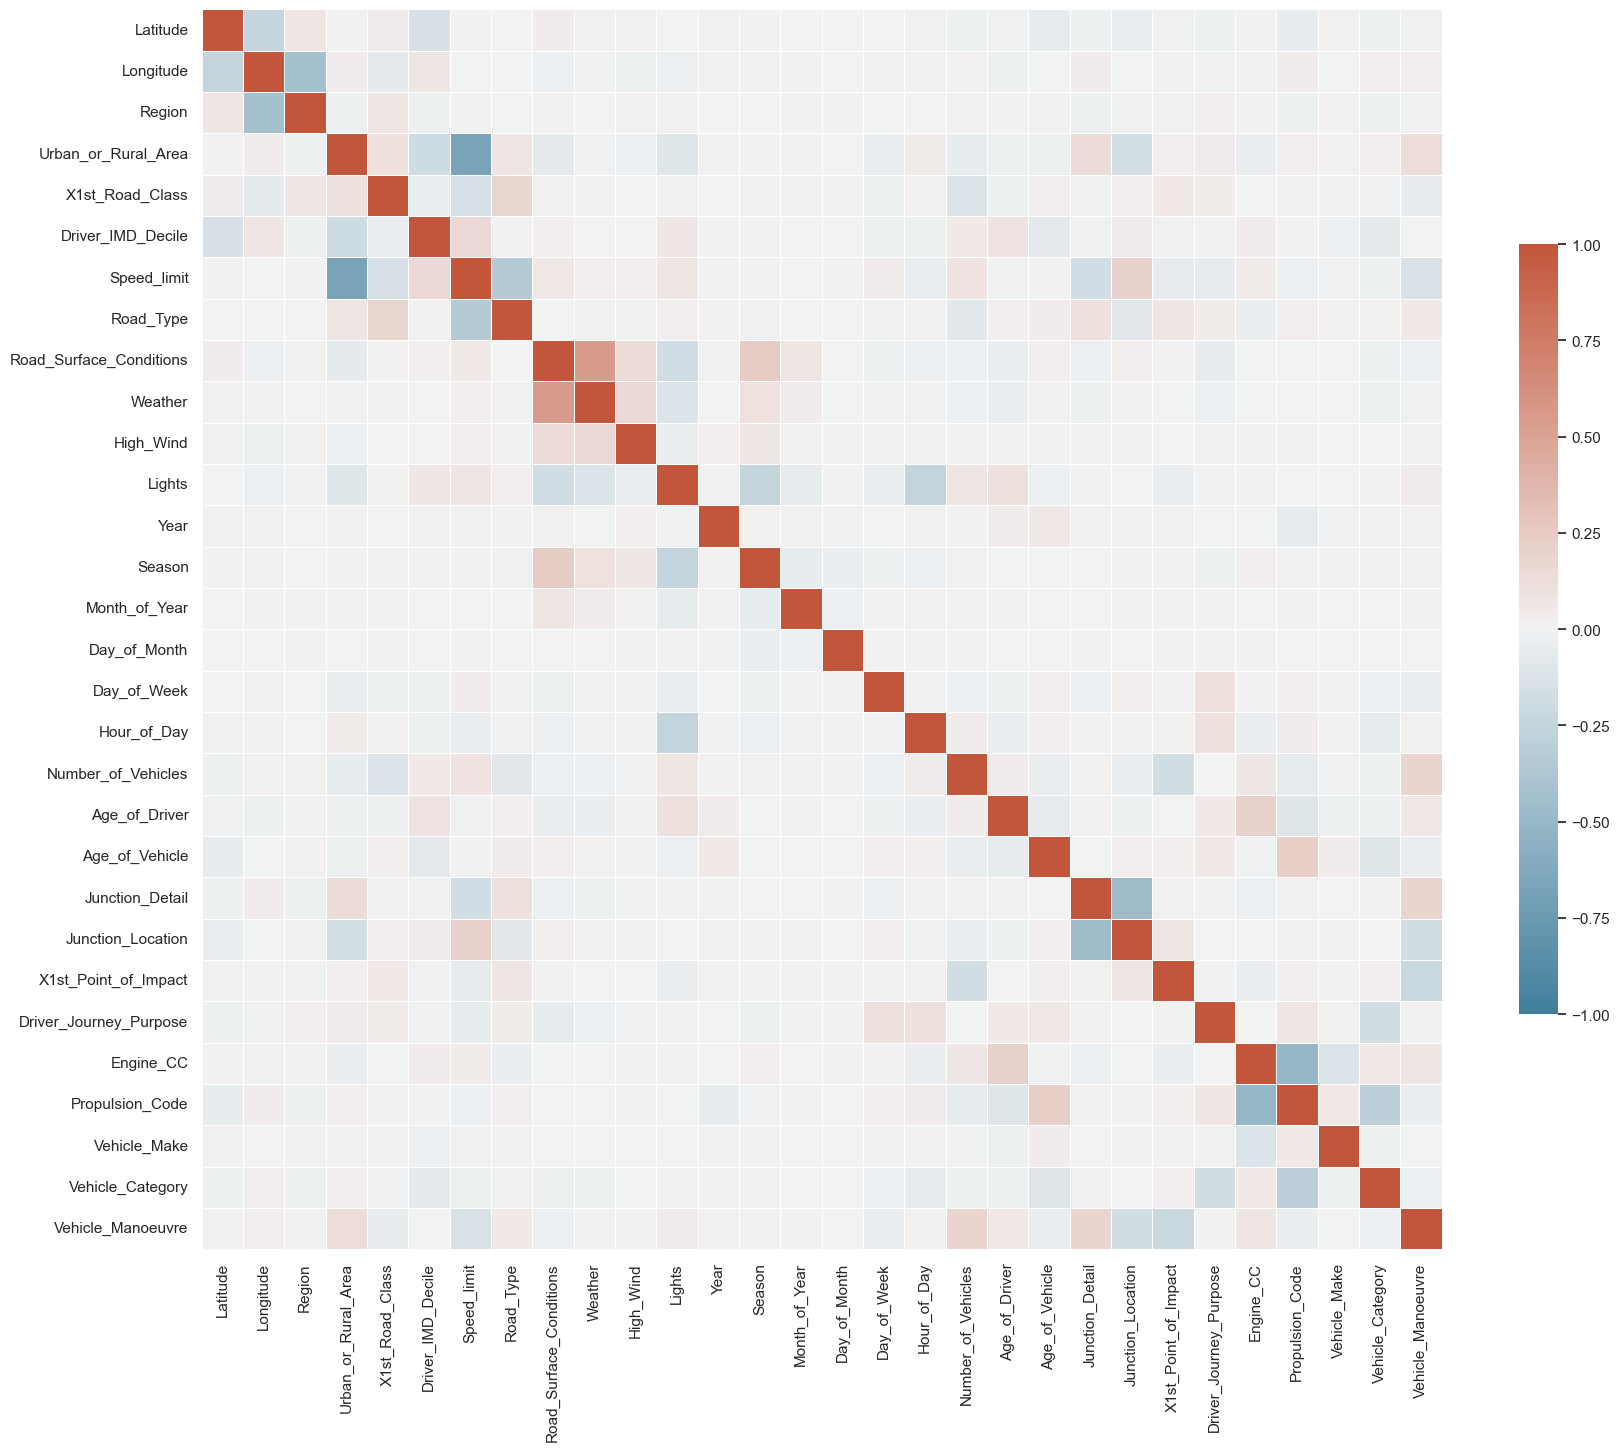

In [3]:
corr = X.corr();  #print(corr)					#COMPUTE CORRELATION OF FEATER MATRIX
print(corr.shape)
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(20, 20))  # Set up the matplotlib figure
cmap = sns.diverging_palette(230, 20, as_cmap=True) 	# Generate a custom diverging colormap
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap, vmin=-1, vmax=1, center=0,
        square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

### Generate a Seaborn pairplot to check any patterns 

### Partition the dataset into training and test sets and train a Sklearn decision tree model

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn import tree
model = tree.DecisionTreeClassifier()
model = model.fit(x_train,y_train)

### Now fit the trained model both on the training and testing sets

ACCURACY: 1.0
NEGATIVE RECALL (Y=0): 1.0
NEGATIVE PRECISION (Y=0): 1.0
POSITIVE RECALL (Y=1): 1.0
POSITIVE PRECISION (Y=1): 1.0
[[45409     0]
 [    0 15031]]


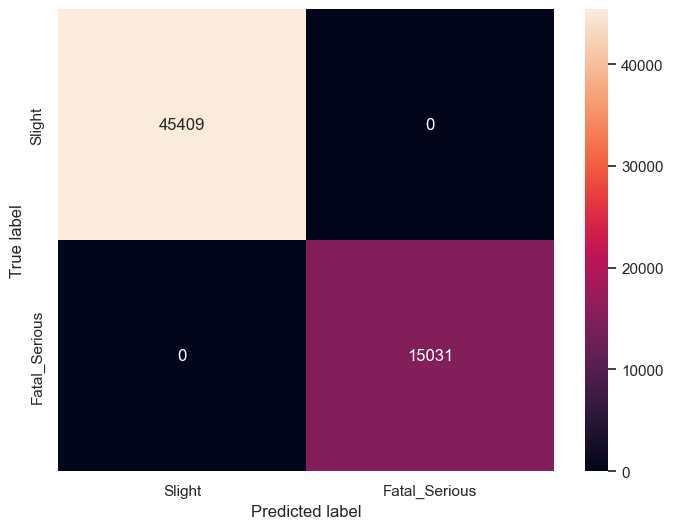

ACCURACY: 0.6613500992720053
NEGATIVE RECALL (Y=0): 0.7665545325779037
NEGATIVE PRECISION (Y=0): 0.7773588293383608
POSITIVE RECALL (Y=1): 0.34976402726796013
POSITIVE PRECISION (Y=1): 0.3359355326114329
[[8659 2637]
 [2480 1334]]


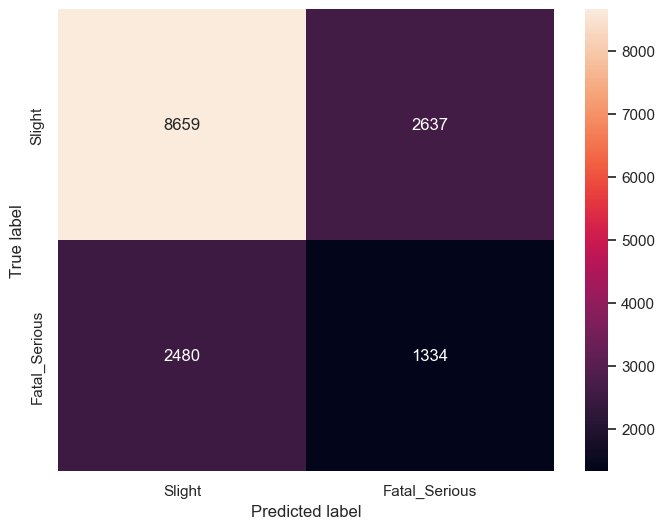

In [16]:
#| code-fold: false
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

def confusion_plot(y_data, y_pred):
    accuracy = metrics.accuracy_score(y_data, y_pred)
    print('ACCURACY:', accuracy)
    pre0 = metrics.precision_score(y_data, y_pred, pos_label='Slight')
    per0 = metrics.recall_score(y_data, y_pred, pos_label='Slight')
    print('NEGATIVE RECALL (Y=0):', per0)
    print('NEGATIVE PRECISION (Y=0):', pre0)
    pre1 = metrics.precision_score(y_data, y_pred, pos_label='Fatal_Serious')
    per1 = metrics.recall_score(y_data, y_pred, pos_label='Fatal_Serious')
    print('POSITIVE RECALL (Y=1):', per1)
    print('POSITIVE PRECISION (Y=1):', pre1)
    matrix = metrics.confusion_matrix(y_data, y_pred, labels=['Slight', 'Fatal_Serious'])
    print(matrix)
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt="d", xticklabels=['Slight', 'Fatal_Serious'], yticklabels=['Slight', 'Fatal_Serious'])
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()
confusion_plot(y_train,yp_train)
confusion_plot(y_test,yp_test)

### The provided confusion matrix suggests that the trained decision tree model excels in accurately predicting negative cases, demonstrating a high level of proficiency in identifying instances where the outcome is not of significant concern. However, the model appears to struggle when it comes to predicting positive cases, particularly those that are critically serious, indicating a limitation in its ability to capture instances with higher importance or severity.

### Now loop over some possible hyper-parameter values to find the best maximum depth for the decision tree model

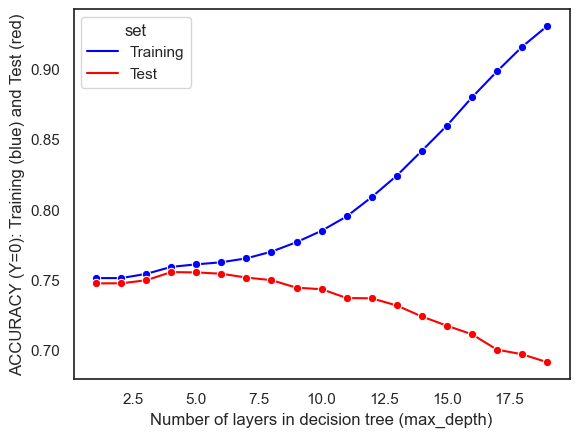

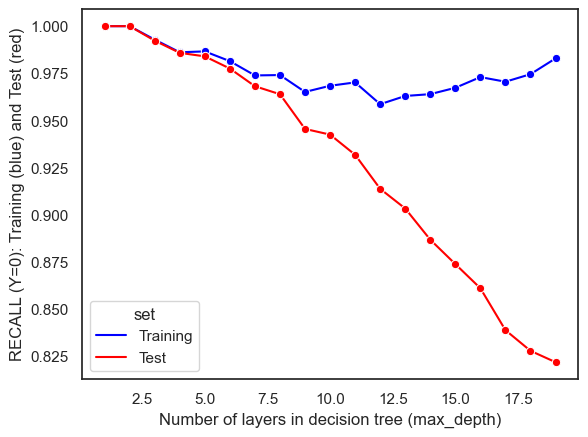

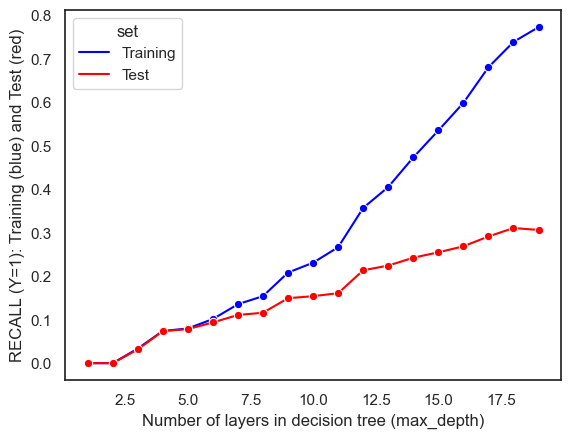

In [19]:
test_results=[]
train_results=[]

for num_layer in range(1,20):
    model = tree.DecisionTreeClassifier(max_depth=num_layer)
    model = model.fit(x_train, y_train)

    yp_train=model.predict(x_train)
    yp_test=model.predict(x_test)

    test_results.append([num_layer,accuracy_score(y_test, yp_test),recall_score(y_test, yp_test,pos_label='Slight'),recall_score(y_test, yp_test,pos_label='Fatal_Serious')])
    train_results.append([num_layer,accuracy_score(y_train, yp_train),recall_score(y_train, yp_train,pos_label='Slight'),recall_score(y_train, yp_train,pos_label='Fatal_Serious')])

columns = ['num_layer', 'accuracy_score', 'recall_score_0','recall_score_1']
df1 = pd.DataFrame(train_results, columns=columns)
df1['set'] = 'Training'
df2 = pd.DataFrame(test_results, columns=columns)
df2['set'] = 'Test'
final = pd.concat([df1, df2], axis=0)
plot1 = sns.lineplot(x=final['num_layer'], y=final['accuracy_score'], hue = final['set'], palette=['blue', 'red'],marker='o')
plot1.set(xlabel = 'Number of layers in decision tree (max_depth)', ylabel = 'ACCURACY (Y=0): Training (blue) and Test (red)')
plt.show()

plot2 = sns.lineplot(x=final['num_layer'], y=final['recall_score_0'], hue = final['set'], palette=['blue', 'red'],marker='o')
plot2.set(xlabel = 'Number of layers in decision tree (max_depth)', ylabel = 'RECALL (Y=0): Training (blue) and Test (red)')
plt.show()

plot3 = sns.lineplot(x=final['num_layer'], y=final['recall_score_1'], hue = final['set'], palette=['blue', 'red'],marker='o')
plot3.set(xlabel = 'Number of layers in decision tree (max_depth)', ylabel = 'RECALL (Y=1): Training (blue) and Test (red)')
plt.show()

### From the above plots, we can tell the best number of layers in the decision tree might be 17, since the model is performing well at correctly identifying instances of the negative class (True Negatives) but is not as effective at capturing instances of the positive class (True Positives).We should select a value for 'max_depth' that is as large as possible.
Let's check the confusion matrix again.

------TRAINING------
ACCURACY: 0.8980972865651886
NEGATIVE RECALL (Y=0): 0.970842784470039
NEGATIVE PRECISION (Y=0): 0.9011651676206051
POSITIVE RECALL (Y=1): 0.6783314483400972
POSITIVE PRECISION (Y=1): 0.8850694444444445
[[44085  1324]
 [ 4835 10196]]


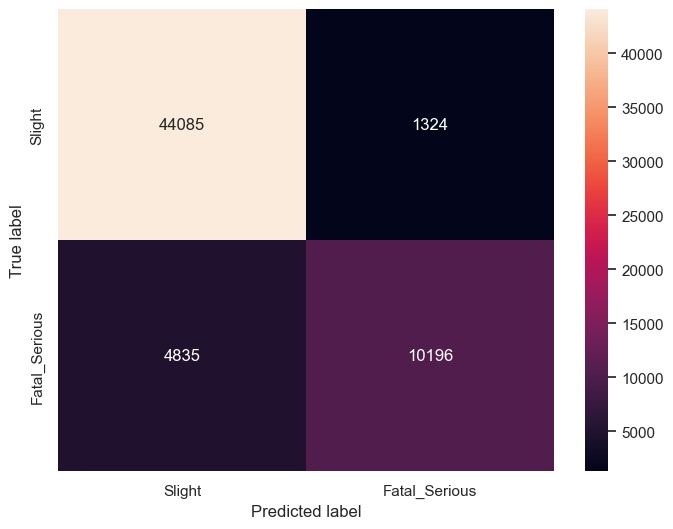

------TEST------
ACCURACY: 0.7033752481800133
NEGATIVE RECALL (Y=0): 0.8414483002832861
NEGATIVE PRECISION (Y=0): 0.7793538865201706
POSITIVE RECALL (Y=1): 0.294441531200839
POSITIVE PRECISION (Y=1): 0.3853809196980096
[[9505 1791]
 [2691 1123]]


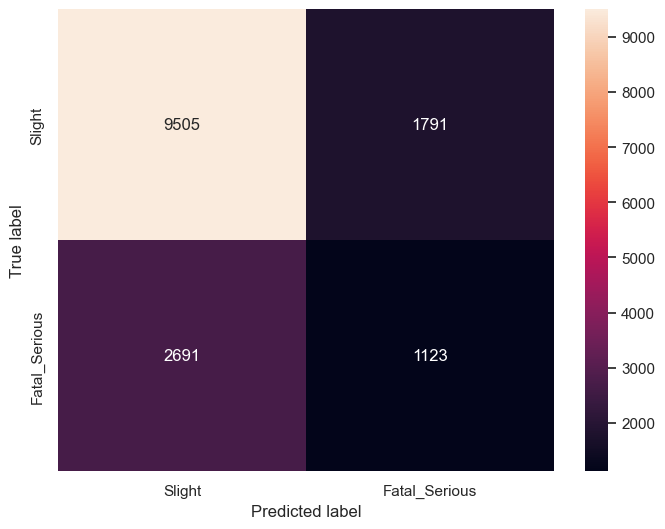

In [23]:
model = tree.DecisionTreeClassifier(max_depth=17)
model = model.fit(x_train,y_train)
yp_train=model.predict(x_train)
yp_test=model.predict(x_test)
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)

## In summary:
Even with a thoughtfully selected number of layers, the decision tree model remains ineffective in capturing instances of the positive class. Hence, we might choose a more complex model such as random forest.